## Preparation

In [1]:
import torch.nn as nn
import sys
from matplotlib import pyplot as plt
%matplotlib inline
import copy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# For drive
path = "/content/drive/My Drive/project/"

sys.path.append(path + "URP")
sys.path.append(path + "URP/learning")
sys.path.append(path + "URP/data")
sys.path.append(path + "URP/models")
sys.path.append(path + "URP/forgetting")
sys.path.append(path + "URP/evaluation")

In [4]:
'''
# For PC
path = ".."
sys.path.append(path)
sys.path.append(path + "/learning")
sys.path.append(path + "/data")
sys.path.append(path + "/models")
sys.path.append(path + "/forgetting")
'''

'\n# For PC\npath = ".."\nsys.path.append(path)\nsys.path.append(path + "/learning")\nsys.path.append(path + "/data")\nsys.path.append(path + "/models")\nsys.path.append(path + "/forgetting")\n'

In [5]:
from data_utils import *#show_random, AddNoise, remove_random, remove_class, combine_datasets
from data import get_dataset, dummy_clusters, dummy_half_doughnuts
from models_utils import *
from eval import *
import models
from learn import *
from forget import *
from utils import set_seed

In [6]:
set_seed()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

SEED SET TO:  13


device(type='cuda', index=0)

##Models and Datasets

In [7]:
cifar10_train, cifar10_val, cifar10_test = get_dataset("cifar10", batch_size=32, cuda=0,
                  train_size=10000, val_size=2000, test_size=1000,
                  test_batch_size=32)
print('-'*20)

cnn = {"filters_percentage": 1, "n_channels":3,"num_classes": 50, "dropout": True, "batch_norm": True}
cnn_model = get_model("cnn", **cnn)
print(cnn_model.__class__.__name__)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/data/cifar-10-python.tar.gz to /root/data
Dataset sizes: 	 train: 10000 	 val: 2000 	 test: 1000
Batch size: 	 32
--------------------
CNN


In [8]:
mnist_train, mnist_val, mnist_test = get_dataset("mnist", batch_size=32, cuda=0,
                  train_size=10000, val_size=2000, test_size=1000,
                  test_batch_size=32)
print('-'*20)

dnn = {"input_size": 1024, "hidden_size":64, "num_classes":10,"num_layer": 10, "activation": nn.ReLU()}
dnn_model = get_model("mlp", **dnn)
print(dnn_model.__class__.__name__)
print('-'*20)

checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
_ = test(model=dnn_model, loss='ce', lossfn=None, optimizer='sgd', device=device, dataset='mnist', test_loader=mnist_test, at_epoch=None)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/train-images-idx3-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw

Dataset sizes: 	 train: 10000 	 val: 2000 	 test: 1000
Batch size: 	 32
--------------------
MLP
--------------------
SEED SET TO:  13
Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.027849437668919563
Error:  0.0
FINISHED TESTING


In [9]:
cifar100_train, cifar100_val, cifar100_test = get_dataset("cifar100", batch_size=32, cuda=0,
                  train_size=20000, val_size=2000, test_size=1000,
                  test_batch_size=10)
print('-'*20)
#---------
resnet18 = {"filters_percentage": 0.4, "n_channels":3,"num_classes": 100, "block": ResBlock, "num_blocks": [2,2,2,2]}
resnet18_origin = get_model("resnet18", **resnet18)
print(resnet18.__class__.__name__)
print('-'*20)
'''
#---------
checkpoint_origin = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
checkpoint_forget = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
checkpoint_retrain = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
#---------
resnet18_origin.load_state_dict(checkpoint_origin['model'])
resnet18_forget = copy.deepcopy(resnet18_origin)
resnet18_forget.load_state_dict(checkpoint_forget['model'])
resnet18_retrain = copy.deepcopy(resnet18_origin)
resnet18_retrain.load_state_dict(checkpoint_retrain['model'])
'''

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting /root/data/cifar-100-python.tar.gz to /root/data
Dataset sizes: 	 train: 20000 	 val: 2000 	 test: 1000
Batch size: 	 32
--------------------
dict
--------------------


'\n#---------\ncheckpoint_origin = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")\ncheckpoint_forget = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")\ncheckpoint_retrain = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")\n#---------\nresnet18_origin.load_state_dict(checkpoint_origin[\'model\'])\nresnet18_forget = copy.deepcopy(resnet18_origin)\nresnet18_forget.load_state_dict(checkpoint_forget[\'model\'])\nresnet18_retrain = copy.deepcopy(resnet18_origin)\nresnet18_retrain.load_state_dict(checkpoint_retrain[\'model\'])\n'

## Forget methods

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])
test(model=cnn_model, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)

print("-"*20)
cnn_retrain = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_retrain_{30}.pth.tar")
cnn_retrain.load_state_dict(checkpoint['model'])
test(model=cnn_retrain, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)

print("-"*20)
cnn_ng = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_neg_grad_{25}.pth.tar")
cnn_ng.load_state_dict(checkpoint['model'])
test(model=cnn_ng, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)
'''
print("-"*20)
cnn_hid = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_hiding_{25}.pth.tar")
cnn_hid.load_state_dict(checkpoint['model'])
test(model=cnn_hid, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)
'''
print("-"*20)
cnn_rl = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_random_labels_{20}.pth.tar")
cnn_rl.load_state_dict(checkpoint['model'])
test(model=cnn_rl, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)

print("-"*20)
cnn_fd = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_FD_{20}.pth.tar")
cnn_fd.load_state_dict(checkpoint['model'])
test(model=cnn_fd, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)
'''
print("-"*20)
cnn_nia = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_NIA_class_{20}.pth.tar")
cnn_nia.load_state_dict(checkpoint['model'])
test(model=cnn_nia, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)
'''
print("-"*20)
cnn_bl = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_backward_learning_{21}.pth.tar")
cnn_bl.load_state_dict(checkpoint['model'])
test(model=cnn_bl, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)

SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.9684426188468933
Error:  0.125
FINISHED TESTING
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  4.388525485992432
Error:  0.5
FINISHED TESTING
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.317772388458252
Error:  0.25
FINISHED TESTING
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.2345035076141357
Error:  0.375
FINISHED TESTING
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.8938524723052979
Error:  0.375
FINISHED TESTING
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  72.3491439819336
Error:  0.875
FINISHED TESTING


In [ ]:
print("-"*20)
cnn_fn = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_finetune_{20}.pth.tar")
cnn_fn.load_state_dict(checkpoint['model'])
test(model=cnn_fn, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)

--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.238495111465454
Error:  0.5
FINISHED TESTING


In [17]:
# NIA and hiding have different acrhitecture, therefore I will train them here again
cnn = {"filters_percentage": 1, "n_channels":3,"num_classes": 50, "dropout": True, "batch_norm": True}
cnn_hid = get_model("cnn", **cnn)

checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_hid.load_state_dict(checkpoint['model'])

random_labels(class_id=0, model=cnn_hid, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.0001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7174574136734009
Error:  0.19354844093322754
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.0725246667861938
Error:  0.2222222089767456
FINISHED TESTING
--------------------
RANDOMING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]


RuntimeError: ignored

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  3.8831124305725098
Error:  1.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  3.9260687828063965
Error:  1.0
FINISHED TESTING
--------------------
TRAINING ENCODER
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 3.9036481380462646, "error": 1.0}
[0] test metrics:{"loss": 3.915205717086792, "error": 1.0}
Epoch number: 0 
Epoch Time: 0.46 sec
[1] train metrics:{"loss": 3.8018596172332764, "error": 1.0}
[1] test metrics:{"loss": 3.8598079681396484, "error": 1.0}
Epoch number: 1 
Epoch Time: 0.41 sec
[2] train metrics:{"loss": 3.650897979736328, "error": 1.0}
[2] test metrics:{"loss": 3.79518985748291, "error": 1.0}
Epoch number: 2 
Epoch Time: 0.41 sec
[3] train metrics:{"loss": 3.5337557792663574, "error":

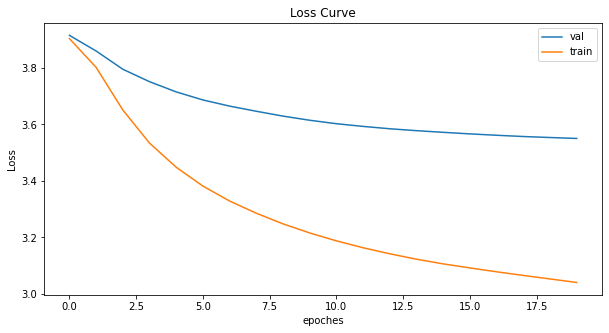

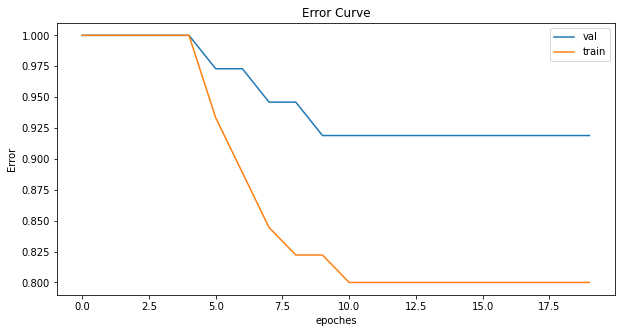

--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]


RuntimeError: ignored

In [18]:
cnn_nia = copy.deepcopy(cnn_model)
# All in one class
nia = NIA()
#print(nia.encoder_model)
cnn_nia = nia.forget_class(class_id=0, model=cnn_nia, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_val,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

## Evaluation

In [ ]:
parameter_count(cnn_model)

Total Number of Parameters: 1627730


In [ ]:
hessian(cifar10_test.dataset, cnn_model)
hessian(cifar10_test.dataset, cnn_retrain)
hessian(cifar10_test.dataset, cnn_ng) # it takes so long
hessian(cifar10_test.dataset, cnn_rl)
hessian(cifar10_test.dataset, cnn_fd)
hessian(cifar10_test.dataset, cnn_bl)


100%|██████████| 1000/1000 [06:27<00:00,  2.58it/s]


In [ ]:
hessian(cifar10_test.dataset, cnn_fn)

100%|██████████| 1000/1000 [06:30<00:00,  2.56it/s]


In [ ]:
copy_params(cnn_retrain, cnn_model)
copy_params(cnn_retrain, cnn_ng)
copy_params(cnn_retrain, cnn_rl)
copy_params(cnn_retrain, cnn_fn)
copy_params(cnn_retrain, cnn_fd)
copy_params(cnn_retrain, cnn_bl)

In [ ]:
_ = distance(cnn_retrain, cnn_model)

_ = distance(cnn_retrain, cnn_ng)
_ = distance(cnn_retrain, cnn_rl)
_ = distance(cnn_retrain, cnn_fn)

_ = distance(cnn_retrain, cnn_fd)
_ = distance(cnn_retrain, cnn_bl)


Distance: 154.0401500955266
Normalized Distance: 2.5578923781105267
Distance: 153.94437839483103
Normalized Distance: 2.5563020543988455
Distance: 154.46013716094376
Normalized Distance: 2.564866415157812
Distance: 154.4701196665084
Normalized Distance: 2.5650321782714056
Distance: 184.82933171228495
Normalized Distance: 3.069157869197932
Distance: 187.44911667798377
Normalized Distance: 3.112660345610048


In [ ]:
_ = KL(cnn_retrain, cnn_model)
print('-'*20)
_ = KL(cnn_retrain, cnn_ng)
print('-'*20)
_ = KL(cnn_retrain, cnn_rl)
print('-'*20)
_ = KL(cnn_retrain, cnn_fn)

print('-'*20)
_ = KL(cnn_retrain, cnn_fd)
print('-'*20)
_ = KL(cnn_retrain, cnn_bl)

features.0.0.weight 35151376.0
features.0.1.weight 1763.5
features.0.1.bias 2474.8
features.1.0.weight 2547106.0
features.1.1.weight 2553.0
features.1.1.bias 4205.4
features.2.0.weight 3232968.5
features.2.1.weight 401.6
features.2.1.bias 1706.8
features.4.0.weight 6462220.0
features.4.1.weight 2267.0
features.4.1.bias 8602.7
features.5.0.weight 7977454.5
features.5.1.weight 3564.6
features.5.1.bias 15328.3
features.6.0.weight 5198038.0
features.6.1.weight 541.6
features.6.1.bias 2718.2
features.8.0.weight 4728469.0
features.8.1.weight 278.7
features.8.1.bias 369.4
features.9.0.weight 667906.6
features.9.1.weight 1691.1
features.9.1.bias 543.5
classifier.0.weight 743638.5
classifier.0.bias 167.8
Total: 66758355.25805664
--------------------
features.0.0.weight 35149324.0
features.0.1.weight 1696.5
features.0.1.bias 2419.9
features.1.0.weight 2538927.5
features.1.1.weight 2553.1
features.1.1.bias 4182.6
features.2.0.weight 3233166.8
features.2.1.weight 395.2
features.2.1.bias 1716.0
fea

In [ ]:
activations_predictions(cnn_model, cifar10_test, 'cnn')

ValueError: ignored

## Evaluation

In [ ]:
parameter_count(cnn_model)

Total Number of Parameters: 1627730


In [ ]:
hessian(cifar10_test.dataset, cnn_model)
hessian(cifar10_test.dataset, cnn_retrain)
hessian(cifar10_test.dataset, cnn_ng) # it takes so long
hessian(cifar10_test.dataset, cnn_rl)
hessian(cifar10_test.dataset, cnn_fd)
hessian(cifar10_test.dataset, cnn_bl)


100%|██████████| 1000/1000 [06:27<00:00,  2.58it/s]


In [ ]:
hessian(cifar10_test.dataset, cnn_fn)

100%|██████████| 1000/1000 [06:30<00:00,  2.56it/s]


In [ ]:
copy_params(cnn_retrain, cnn_model)
copy_params(cnn_retrain, cnn_ng)
copy_params(cnn_retrain, cnn_rl)
copy_params(cnn_retrain, cnn_fn)
copy_params(cnn_retrain, cnn_fd)
copy_params(cnn_retrain, cnn_bl)

In [ ]:
_ = distance(cnn_retrain, cnn_model)

_ = distance(cnn_retrain, cnn_ng)
_ = distance(cnn_retrain, cnn_rl)
_ = distance(cnn_retrain, cnn_fn)

_ = distance(cnn_retrain, cnn_fd)
_ = distance(cnn_retrain, cnn_bl)


Distance: 154.0401500955266
Normalized Distance: 2.5578923781105267
Distance: 153.94437839483103
Normalized Distance: 2.5563020543988455
Distance: 154.46013716094376
Normalized Distance: 2.564866415157812
Distance: 154.4701196665084
Normalized Distance: 2.5650321782714056
Distance: 184.82933171228495
Normalized Distance: 3.069157869197932
Distance: 187.44911667798377
Normalized Distance: 3.112660345610048


In [ ]:
_ = KL(cnn_retrain, cnn_model)
print('-'*20)
_ = KL(cnn_retrain, cnn_ng)
print('-'*20)
_ = KL(cnn_retrain, cnn_rl)
print('-'*20)
_ = KL(cnn_retrain, cnn_fn)

print('-'*20)
_ = KL(cnn_retrain, cnn_fd)
print('-'*20)
_ = KL(cnn_retrain, cnn_bl)

features.0.0.weight 35151376.0
features.0.1.weight 1763.5
features.0.1.bias 2474.8
features.1.0.weight 2547106.0
features.1.1.weight 2553.0
features.1.1.bias 4205.4
features.2.0.weight 3232968.5
features.2.1.weight 401.6
features.2.1.bias 1706.8
features.4.0.weight 6462220.0
features.4.1.weight 2267.0
features.4.1.bias 8602.7
features.5.0.weight 7977454.5
features.5.1.weight 3564.6
features.5.1.bias 15328.3
features.6.0.weight 5198038.0
features.6.1.weight 541.6
features.6.1.bias 2718.2
features.8.0.weight 4728469.0
features.8.1.weight 278.7
features.8.1.bias 369.4
features.9.0.weight 667906.6
features.9.1.weight 1691.1
features.9.1.bias 543.5
classifier.0.weight 743638.5
classifier.0.bias 167.8
Total: 66758355.25805664
--------------------
features.0.0.weight 35149324.0
features.0.1.weight 1696.5
features.0.1.bias 2419.9
features.1.0.weight 2538927.5
features.1.1.weight 2553.1
features.1.1.bias 4182.6
features.2.0.weight 3233166.8
features.2.1.weight 395.2
features.2.1.bias 1716.0
fea

In [ ]:
activations_predictions(cnn_model, cifar10_test, 'cnn')

ValueError: ignored

## Attacks

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm.autonotebook import tqdm


def entropy(p, dim = -1, keepdim = False):
    return -torch.where(p > 0, p * p.log(), p.new([0.0])).sum(dim=dim, keepdim=keepdim)

def collect_prob(data_loader, model):
    
    data_loader = torch.utils.data.DataLoader(data_loader.dataset, batch_size=1, shuffle=False)
    prob = []
    with torch.no_grad():
        for idx, batch in enumerate(tqdm(data_loader, leave=False)):
            batch = [tensor.to(next(model.parameters()).device) for tensor in batch]
            data, target = batch
            output = model(data)
            prob.append(F.softmax(output, dim=-1).data)
    return torch.cat(prob)

def get_membership_attack_data(retain_loader, forget_loader, test_loader, model):    
    retain_prob = collect_prob(retain_loader, model)
    forget_prob = collect_prob(forget_loader, model)
    test_prob = collect_prob(test_loader, model)
    
    X_r = torch.cat([entropy(retain_prob), entropy(test_prob)]).cpu().numpy().reshape(-1, 1)
    Y_r = np.concatenate([np.ones(len(retain_prob)), np.zeros(len(test_prob))])
    
    X_f = entropy(forget_prob).cpu().numpy().reshape(-1, 1)
    Y_f = np.concatenate([np.ones(len(forget_prob))])    
    return X_f, Y_f, X_r, Y_r

def get_membership_attack_prob(retain_loader, forget_loader, test_loader, model):
    X_f, Y_f, X_r, Y_r = get_membership_attack_data(retain_loader, forget_loader, test_loader, model)
    clf = SVC(C=3,gamma='auto',kernel='rbf')
    #clf = LogisticRegression(class_weight='balanced',solver='lbfgs',multi_class='multinomial')
    clf.fit(X_r, Y_r)
    results = clf.predict(X_f)
    return results.mean()
    
def plot_entropy_dist(model, ax, title):
    train_loader_full, test_loader_full = datasets.get_loaders(dataset, batch_size=100, seed=0, augment=False, shuffle=False)
    indexes = np.flatnonzero(np.array(train_loader_full.dataset.targets) == class_to_forget)
    replaced = np.random.RandomState(0).choice(indexes, size=100 if num_to_forget==100 else len(indexes), replace=False)
    X_f, Y_f, X_r, Y_r = get_membership_attack_data(train_loader_full, test_loader_full, model, replaced)
    sns.distplot(np.log(X_r[Y_r==1]).reshape(-1), kde=False, norm_hist=True, rug=False, label='retain', ax=ax)
    sns.distplot(np.log(X_r[Y_r==0]).reshape(-1), kde=False, norm_hist=True, rug=False, label='test', ax=ax)
    sns.distplot(np.log(X_f).reshape(-1), kde=False, norm_hist=True, rug=False, label='forget', ax=ax)
    ax.legend(prop={'size': 14})
    ax.tick_params(labelsize=12)
    ax.set_title(title,size=18)
    ax.set_xlabel('Log of Entropy',size=14)
    ax.set_ylim(0,0.4)
    ax.set_xlim(-35,2)

def membership_attack(retain_loader,forget_loader,test_loader,model):
    prob = get_membership_attack_prob(retain_loader,forget_loader,test_loader,model)
    print("Attack prob: ", prob)
    return prob

In [ ]:
from data_utils import *
retain_train,forget_train = remove_class(cifar10_test, [0])

In [ ]:
membership_attack(retain_train, forget_train, cifar10_train, cnn_model)

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Attack prob:  0.0


0.0

In [ ]:
membership_attack(retain_train,forget_train, cifar10_train, cnn_retrain)

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Attack prob:  0.0


0.0

In [ ]:
membership_attack(retain_train,forget_train, cifar10_test, cnn_fd)

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack prob:  0.0


0.0

In [ ]:
membership_attack(retain_train,forget_train, cifar10_train, cnn_bl)

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
membership_attack(retain_train,forget_train, cifar10_test, cnn_ng)

  0%|          | 0/9027 [00:00<?, ?it/s]

  0%|          | 0/973 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack prob:  1.0


1.0

In [ ]:
membership_attack(retain_train,forget_train, cifar10_test, cnn_rl)

  0%|          | 0/9027 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
membership_attack(retain_train,forget_train, cifar10_test, cnn_fn)

##MLP

## Forget methods

In [14]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
test(model=dnn_model, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=mnist_test, at_epoch=None)

print("-"*20)
dnn_retrain = copy.deepcopy(dnn_model)
heckpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{51}.pth.tar")
dnn_retrain.load_state_dict(checkpoint['model'])
test(model=dnn_retrain, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=mnist_test, at_epoch=None)

print("-"*20)
dnn_ng = copy.deepcopy(dnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_neg_grad_{15}.pth.tar")
dnn_ng.load_state_dict(checkpoint['model'])
test(model=dnn_ng, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=mnist_test, at_epoch=None)
'''
print("-"*20)
cnn_hid = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_hiding_{25}.pth.tar")
cnn_hid.load_state_dict(checkpoint['model'])
test(model=cnn_hid, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)
'''
print("-"*20)
dnn_rl = copy.deepcopy(dnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_random_labels_{20}.pth.tar")
dnn_rl.load_state_dict(checkpoint['model'])
test(model=dnn_rl, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=mnist_test, at_epoch=None)

print("-"*20)
dnn_fd = copy.deepcopy(dnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_FD_{23}.pth.tar")
dnn_fd.load_state_dict(checkpoint['model'])
test(model=dnn_fd, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=mnist_test, at_epoch=None)
'''
print("-"*20)
cnn_nia = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_NIA_class_{20}.pth.tar")
cnn_nia.load_state_dict(checkpoint['model'])
test(model=cnn_nia, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)
'''
print("-"*20)
dnn_bl = copy.deepcopy(dnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_backward_learning_{6}.pth.tar")
dnn_bl.load_state_dict(checkpoint['model'])
test(model=dnn_bl, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=mnist_test, at_epoch=None)

SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.027849437668919563
Error:  0.0
FINISHED TESTING
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.027849437668919563
Error:  0.0
FINISHED TESTING
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  13.555619239807129
Error:  0.625
FINISHED TESTING
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  3.3954825401306152
Error:  0.25
FINISHED TESTING
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.9117323756217957
Error:  0.25
FINISHED TESTING
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.9993606805801392
Error:  0.25
FINISHED TESTING


In [16]:
print("-"*20)
dnn_fn = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_finetune_{14}.pth.tar")
dnn_fn.load_state_dict(checkpoint['model'])
test(model=dnn_fn, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=mnist_test, at_epoch=None)

--------------------


RuntimeError: ignored

In [20]:
dnn_nia = copy.deepcopy(cnn_model)
# All in one class
nia = NIA()
#print(nia.encoder_model)
dnn_nia = nia.forget_class(class_id=0, model=dnn_nia, loss='ce', optimizer='adam', epochs=20, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train, val_loader=mnist_val,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING


RuntimeError: ignored

In [27]:
parameter_count(dnn_model)

Total Number of Parameters: 99530


In [23]:
_ = distance(dnn_retrain, dnn_model)

_ = distance(dnn_retrain, dnn_ng)
_ = distance(dnn_retrain, dnn_rl)
#_ = distance(dnn_retrain, dnn_fn)

_ = distance(dnn_retrain, dnn_fd)
_ = distance(dnn_retrain, dnn_bl)

Distance: 0.0
Normalized Distance: 0.0
Distance: 3.6399264523716317
Normalized Distance: 0.08153965418078088
Distance: 18.02149407535456
Normalized Distance: 0.4037077160633167
Distance: 38.23416261610089
Normalized Distance: 0.8565009316540728
Distance: 1.4079905406861175
Normalized Distance: 0.03154103888625359


In [26]:
'''
copy_params(cnn_retrain, cnn_model)
copy_params(cnn_retrain, cnn_ng)
copy_params(cnn_retrain, cnn_rl)
copy_params(cnn_retrain, cnn_fn)
copy_params(cnn_retrain, cnn_fd)
copy_params(cnn_retrain, cnn_bl)
'''
#copy_params(dnn_retrain, dnn_fn)
_ = distance(dnn_retrain, dnn_fd)

Distance: 38.23416261610089
Normalized Distance: 0.8565009316540728


In [35]:
dat = mnist_train.dataset
hessian(dat, dnn_model)
hessian(dat, dnn_retrain)
hessian(dat, dnn_ng) # it takes so long
hessian(dat, dnn_rl)
hessian(dat, dnn_fd)
hessian(dat, dnn_bl)

hessian(dat, dnn_fn)

  0%|          | 0/10000 [00:00<?, ?it/s]


RuntimeError: ignored

In [38]:
copy_params(dnn_retrain, dnn_model)
copy_params(dnn_retrain, dnn_ng)
copy_params(dnn_retrain, dnn_rl)
#copy_params(dnn_retrain, dnn_fn)
copy_params(dnn_retrain, dnn_fd)
copy_params(dnn_retrain, dnn_bl)

In [39]:
_ = KL(dnn_retrain, dnn_model)
print('-'*20)
_ = KL(dnn_retrain, dnn_ng)
print('-'*20)
_ = KL(dnn_retrain, dnn_rl)
#print('-'*20)
#_ = KL(dnn_retrain, dnn_fn)

print('-'*20)
_ = KL(dnn_retrain, dnn_fd)
print('-'*20)
_ = KL(dnn_retrain, dnn_bl)

layers.0.weight 16.4
layers.0.bias 0.7
layers.2.weight 14.4
layers.2.bias 0.9
layers.4.weight 4.7
layers.4.bias 0.3
layers.6.weight 0.4
layers.6.bias 0.1
layers.8.weight 0.2
layers.8.bias 0.0
layers.10.weight 0.1
layers.10.bias 0.0
layers.12.weight 0.2
layers.12.bias 0.0
layers.14.weight 0.1
layers.14.bias 0.0
layers.16.weight 0.1
layers.16.bias 0.0


NameError: ignored

In [32]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/ResNet18_{200}.pth.tar")
resnet18_origin.load_state_dict(checkpoint['model'])
test(model=resnet18_origin, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar100_test, at_epoch=None)

SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  3.240525722503662
Error:  0.5
FINISHED TESTING


In [33]:
parameter_count(resnet18_origin)

Total Number of Parameters: 1805624


In [34]:
regression = LinearRegression(1024, 10)
parameter_count(regression)

Total Number of Parameters: 10250


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")
regression.load_state_dict(checkpoint['model'])
_ = test(model=regression, loss='ce', lossfn=None, optimizer='sgd', device=device, dataset='mnist', test_loader=fmnist_test, at_epoch=None)